In [ ]:
#Libraries 
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')
from sklearn import metrics
from sklearn.metrics import r2_score

#neural network
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from fbprophet import Prophet

In [ ]:
#Loading Data
from google.colab import files
uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD.csv


In [ ]:
#storing data
df = pd.read_csv('BTC-USD.csv')
#df = df.reset_index()
#showing first few rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2587 non-null   object 
 1   Open       2583 non-null   float64
 2   High       2583 non-null   float64
 3   Low        2583 non-null   float64
 4   Close      2583 non-null   float64
 5   Adj Close  2583 non-null   float64
 6   Volume     2583 non-null   float64
dtypes: float64(6), object(1)
memory usage: 141.6+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2.583000e+03
mean,9400.048053,9668.502386,9114.186078,9422.977756,9422.977756,1.373455e+10
std,13775.684391,14194.890140,13319.523448,13812.089925,13812.089925,1.989676e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,577.671997,582.812988,573.377502,577.486481,577.486481,7.401720e+07
50%,5466.524414,5633.802246,5295.877930,5505.283691,5505.283691,4.553270e+09
75%,9693.365235,9896.820312,9492.367188,9695.651367,9695.651367,2.218633e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [ ]:
df['Date']= pd.to_datetime(df['Date']).dt.date

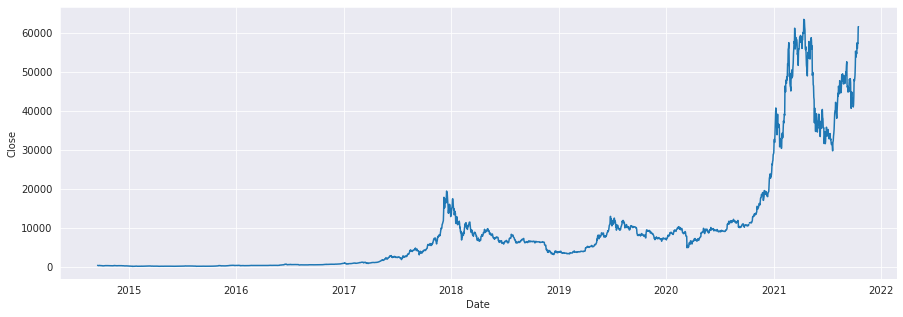

In [ ]:
x = df['Date']
y = df['Close']
# plotting the points
plt.plot(x,y)
# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('Close')
plt.show()

**Linear Regression Model**

In [ ]:
X = df[['Date','Open']] #removed date and adj close
y = df['Close']

In [ ]:
#convert date to a numerical value
X['Date'] = pd.to_datetime(X['Date'])
X['Date']=X['Date'].map(datetime.datetime.toordinal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X

,Date,Open
0,735493,465.864014
1,735494,456.859985
2,735495,424.102997
3,735496,394.673004
4,735497,408.084991
...,...,...
2582,738075,57526.832031
2583,738076,56038.257813
2584,738077,57372.832031
2585,738078,57345.902344


In [ ]:
X.isnull().any()

Date    False
Open     True
dtype: bool

In [ ]:
y.isnull().any()

True

In [ ]:
X = X.fillna(method='ffill')
y = y.fillna(method='ffill')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)
print('Training Observations x train: %d' % (len(X_train)))
print('Testing Observations x test: %d' % (len(X_test)))
print('Training Observations y train: %d' % (len(y_train)))
print('Testing Observations y test: %d' % (len(y_test)))

Training Observations x train: 2069
Testing Observations x test: 518
Training Observations y train: 2069
Testing Observations y test: 518


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2069 non-null   int64  
 1   Open    2069 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 48.5 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518 entries, 2069 to 2586
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    518 non-null    int64  
 1   Open    518 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 12.1 KB


In [ ]:
y_train

0        457.334015
1        424.440002
2        394.795990
3        408.903992
4        398.821014
           ...     
2064    8804.477539
2065    9269.987305
2066    9733.721680
2067    9328.197266
2068    9377.013672
Name: Close, Length: 2069, dtype: float64

In [ ]:
y_test

2069     9670.739258
2070     9726.575195
2071     9729.038086
2072     9522.981445
2073     9081.761719
            ...     
2582    56041.058594
2583    57401.097656
2584    57321.523438
2585    61593.949219
2586    61628.851563
Name: Close, Length: 518, dtype: float64

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



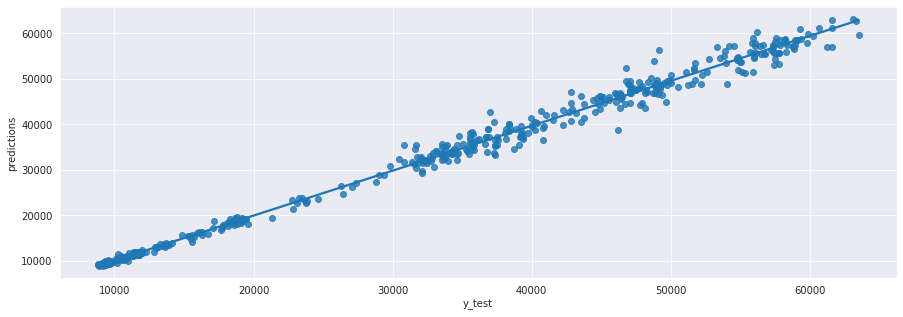

In [ ]:
predictions = lm.predict(X_test)
sns.regplot(y_test, predictions, ci=None)
#plt.scatter(y_test,predictions)
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.show()

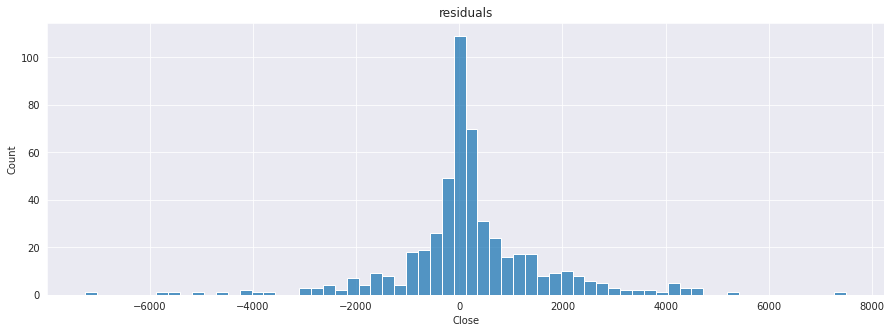

In [ ]:
residuals = y_test - predictions
sns.histplot(residuals)
plt.title("residuals")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 933.785139401044
MSE: 2224363.113205467
RMSE: 1491.429888799828


In [ ]:
print('R2 Score: ', r2_score(y_test, predictions))

R2 Score:  0.9928715859599644


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Date,0.040141
Open,0.992969


**Facebook prophet prediction model (Forecast Model)**



In [ ]:
df['Date']= pd.to_datetime(df['Date']).dt.date

In [ ]:
fbModel = df.copy()


In [ ]:
fbModel.drop(['Open','High','Low','Adj Close','Volume'], axis = 1, inplace = True)

In [ ]:
fbModel.head()

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [ ]:
fbModelFull = fbModel.copy()
fbModelFull.head()

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [ ]:
fbModel = fbModel[fbModel['Date']<datetime.date(2020,5,17)]
fbModel.columns = ['ds','y']

In [ ]:
#All values up to end of 2019
fbModel

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
2064,2020-05-12,8804.477539
2065,2020-05-13,9269.987305
2066,2020-05-14,9733.721680
2067,2020-05-15,9328.197266


In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(fbModel)

In [ ]:
future = m.make_future_dataframe(periods=645, freq = 'D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,473.761027,-1341.122305,3064.586531,473.761027,473.761027,438.120213,438.120213,438.120213,126.781371,126.781371,126.781371,-2.690514,-2.690514,-2.690514,314.029356,314.029356,314.029356,0.0,0.0,0.0,911.881239
1,2014-09-18,472.559029,-1500.238727,3173.325050,472.559029,472.559029,397.771777,397.771777,397.771777,126.781371,126.781371,126.781371,-12.398600,-12.398600,-12.398600,283.389007,283.389007,283.389007,0.0,0.0,0.0,870.330807
2,2014-09-19,471.357032,-1393.152105,3015.211826,471.357032,471.357032,384.711578,384.711578,384.711578,126.781371,126.781371,126.781371,5.716158,5.716158,5.716158,252.214049,252.214049,252.214049,0.0,0.0,0.0,856.068610
3,2014-09-20,470.155035,-1560.179143,2929.267746,470.155035,470.155035,356.491245,356.491245,356.491245,126.781371,126.781371,126.781371,9.171401,9.171401,9.171401,220.538474,220.538474,220.538474,0.0,0.0,0.0,826.646279
4,2014-09-21,468.953037,-1506.144866,2949.189082,468.953037,468.953037,310.126813,310.126813,310.126813,126.781371,126.781371,126.781371,-5.073522,-5.073522,-5.073522,188.418964,188.418964,188.418964,0.0,0.0,0.0,779.079850


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2709,2022-02-16,14511.595677,-14772.831792,42710.767808,-15131.884141,42979.362201,-299.434849,-299.434849,-299.434849,126.781371,126.781371,126.781371,-2.690514,-2.690514,-2.690514,-423.525706,-423.525706,-423.525706,0.0,0.0,0.0,14212.160828
2710,2022-02-17,14519.249158,-15808.515978,42643.693710,-15199.177885,43072.640406,-274.598617,-274.598617,-274.598617,126.781371,126.781371,126.781371,-12.398600,-12.398600,-12.398600,-388.981387,-388.981387,-388.981387,0.0,0.0,0.0,14244.650541
2711,2022-02-18,14526.902638,-15596.800429,43692.870669,-15266.471629,43165.918611,-223.494214,-223.494214,-223.494214,126.781371,126.781371,126.781371,5.716158,5.716158,5.716158,-355.991743,-355.991743,-355.991743,0.0,0.0,0.0,14303.408424
2712,2022-02-19,14534.556118,-15417.808530,42734.925903,-15333.765373,43259.196816,-189.534764,-189.534764,-189.534764,126.781371,126.781371,126.781371,9.171401,9.171401,9.171401,-325.487535,-325.487535,-325.487535,0.0,0.0,0.0,14345.021354
2713,2022-02-20,14542.209598,-15275.430294,43550.791540,-15401.059117,43352.475021,-176.655257,-176.655257,-176.655257,126.781371,126.781371,126.781371,-5.073522,-5.073522,-5.073522,-298.363106,-298.363106,-298.363106,0.0,0.0,0.0,14365.554341


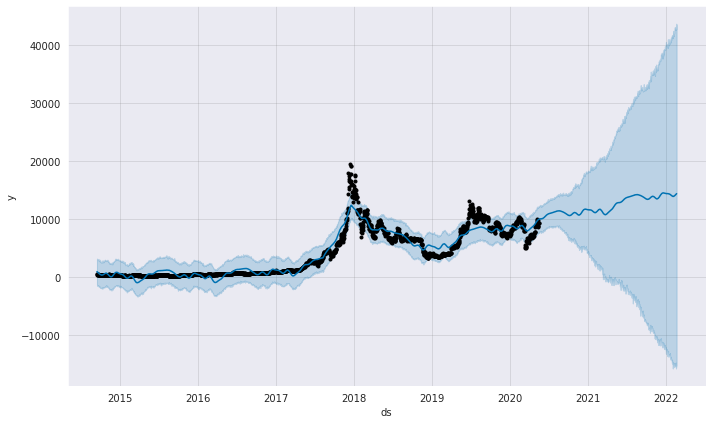

In [ ]:
plot1 = m.plot(forecast)
# 80% of the data and predict the rest. 

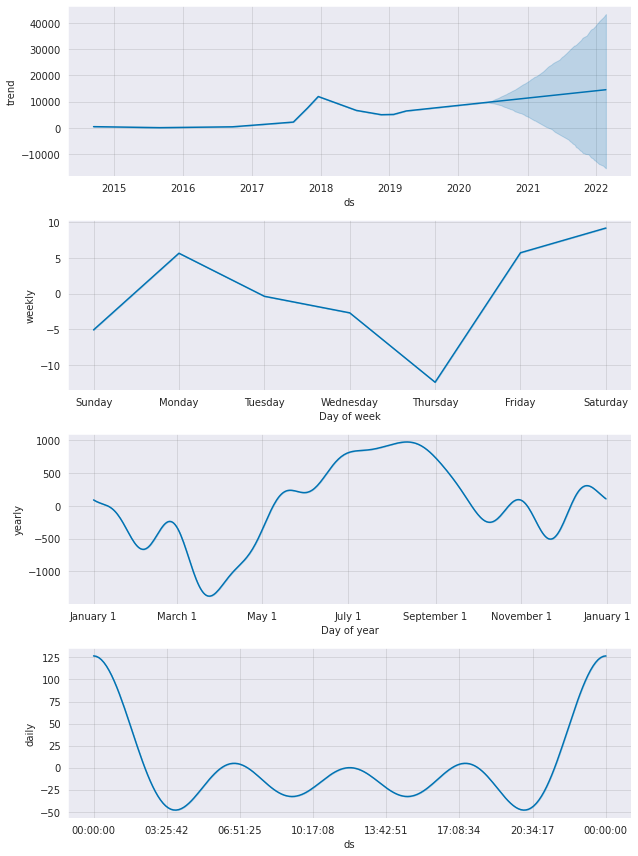

In [ ]:
plot2 = m.plot_components(forecast)
# outdated trends/ trends before 2020

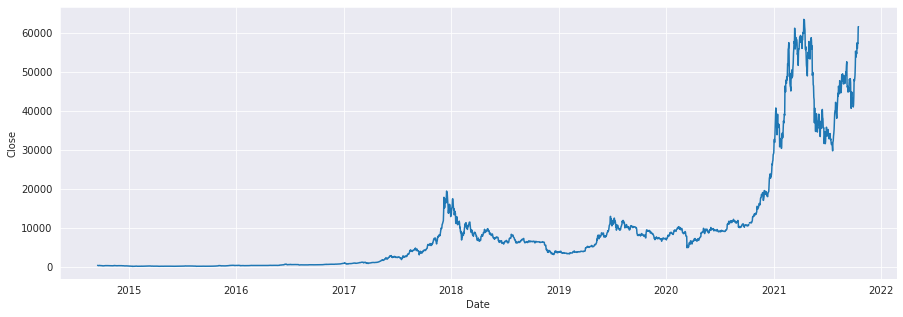

In [ ]:
x = fbModelFull['Date']
y = fbModelFull['Close']
# plotting the points
plt.plot(x,y)
# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('Close')
plt.show()
# 100% of data/ overview of the data no predictions

**Facebook model with all data**

In [ ]:
df['Date']= pd.to_datetime(df['Date']).dt.date

In [ ]:
fbModel = df.copy()

In [ ]:
fbModel.drop(['Open','High','Low','Adj Close','Volume'], axis = 1, inplace = True)

In [ ]:
fbModel.head()

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [ ]:
fbModelFull = fbModel.copy()
fbModelFull.head()

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [ ]:
fbModel.columns = ['ds','y']

In [ ]:
fbModel

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
2582,2021-10-12,56041.058594
2583,2021-10-13,57401.097656
2584,2021-10-14,57321.523438
2585,2021-10-15,61593.949219


In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(fbModel)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
future = m.make_future_dataframe(periods=1, freq = 'D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,415.881911,-10496.763355,6751.199886,415.881911,415.881911,-2533.896663,-2533.896663,-2533.896663,-157.796192,-157.796192,-157.796192,-8.554073,-8.554073,-8.554073,-2367.546398,-2367.546398,-2367.546398,0.0,0.0,0.0,-2118.014752
1,2014-09-18,415.182408,-10532.783053,6319.497419,415.182408,415.182408,-2598.204259,-2598.204259,-2598.204259,-157.796192,-157.796192,-157.796192,-29.270135,-29.270135,-29.270135,-2411.137932,-2411.137932,-2411.137932,0.0,0.0,0.0,-2183.021851
2,2014-09-19,414.482905,-10421.840201,6486.891928,414.482905,414.482905,-2551.205506,-2551.205506,-2551.205506,-157.796192,-157.796192,-157.796192,53.833120,53.833120,53.833120,-2447.242434,-2447.242434,-2447.242434,0.0,0.0,0.0,-2136.722601
3,2014-09-20,413.783401,-11091.162917,6445.863259,413.783401,413.783401,-2601.795236,-2601.795236,-2601.795236,-157.796192,-157.796192,-157.796192,31.420078,31.420078,31.420078,-2475.419121,-2475.419121,-2475.419121,0.0,0.0,0.0,-2188.011834
4,2014-09-21,413.083898,-10460.747914,6477.364886,413.083898,413.083898,-2671.509784,-2671.509784,-2671.509784,-157.796192,-157.796192,-157.796192,-18.393462,-18.393462,-18.393462,-2495.320130,-2495.320130,-2495.320130,0.0,0.0,0.0,-2258.425886


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2583,2021-10-13,55389.571686,45415.617873,62519.738584,55389.571686,55389.571686,-1519.079398,-1519.079398,-1519.079398,-157.796192,-157.796192,-157.796192,-8.554073,-8.554073,-8.554073,-1352.729132,-1352.729132,-1352.729132,0.0,0.0,0.0,53870.492288
2584,2021-10-14,55482.621131,45095.602569,62608.611490,55482.621131,55482.621131,-1482.205503,-1482.205503,-1482.205503,-157.796192,-157.796192,-157.796192,-29.270135,-29.270135,-29.270135,-1295.139176,-1295.139176,-1295.139176,0.0,0.0,0.0,54000.415628
2585,2021-10-15,55575.670576,45369.781959,62572.768272,55575.670576,55575.670576,-1347.234902,-1347.234902,-1347.234902,-157.796192,-157.796192,-157.796192,53.833120,53.833120,53.833120,-1243.271830,-1243.271830,-1243.271830,0.0,0.0,0.0,54228.435674
2586,2021-10-16,55668.720021,45662.711782,62743.597127,55668.720021,55668.720021,-1323.954988,-1323.954988,-1323.954988,-157.796192,-157.796192,-157.796192,31.420078,31.420078,31.420078,-1197.578873,-1197.578873,-1197.578873,0.0,0.0,0.0,54344.765034
2587,2021-10-17,55761.769467,45893.179209,62241.432353,55761.769467,55761.769467,-1334.595570,-1334.595570,-1334.595570,-157.796192,-157.796192,-157.796192,-18.393462,-18.393462,-18.393462,-1158.405915,-1158.405915,-1158.405915,0.0,0.0,0.0,54427.173896


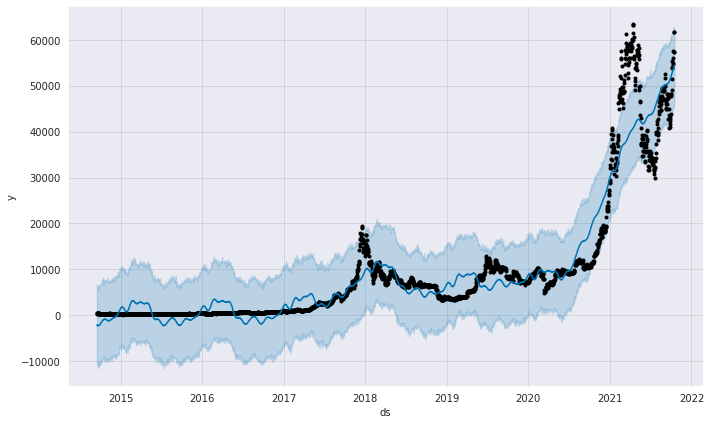

In [ ]:
plot1 = m.plot(forecast)
# 100% of data predicted last cell above

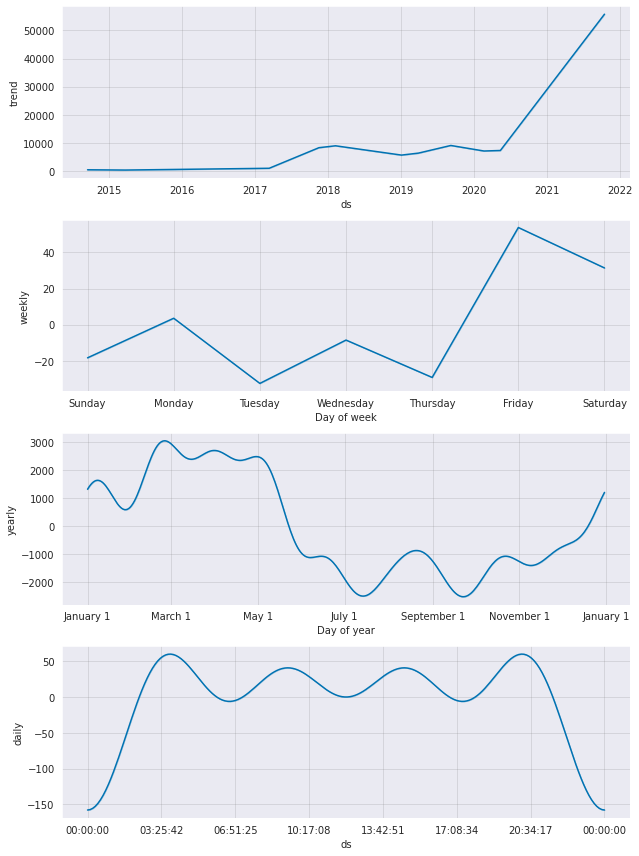

In [ ]:
plot2 = m.plot_components(forecast)

**Deep Neural Multilayer Perceptron (Neural Network Regression)**

In [ ]:
Xn = df[['Date','Open']] #removed date and adj close
yn = df['Close']


In [ ]:
#convert date to a numerical value
Xn['Date'] = pd.to_datetime(Xn['Date'])
Xn['Date']=Xn['Date'].map(datetime.datetime.toordinal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Xn.isnull().any()

Date    False
Open     True
dtype: bool

In [ ]:
yn.isnull().any()

True

In [ ]:
Xn = Xn.fillna(method='ffill')
yn = yn.fillna(method='ffill')

In [ ]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.20, shuffle=False)
print('Training Observations x train: %d' % (len(X_train)))
print('Testing Observations x test: %d' % (len(X_test)))
print('Training Observations y train: %d' % (len(y_train)))
print('Testing Observations y test: %d' % (len(y_test)))

Training Observations x train: 2069
Testing Observations x test: 518
Training Observations y train: 2069
Testing Observations y test: 518


In [ ]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(Xn_train)
X_testscaled=sc_X.transform(Xn_test)

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, yn_train)

In [ ]:
y_pred=reg.predict(X_testscaled)
print(r2_score(y_pred, yn_test))

0.9926632004545088


In [ ]:
print('MAE:', metrics.mean_absolute_error(yn_test, y_pred))
print('MSE:', metrics.mean_squared_error(yn_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(yn_test, y_pred)))

MAE: 941.1993845562647
MSE: 2247874.3659603177
RMSE: 1499.2912878958236


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



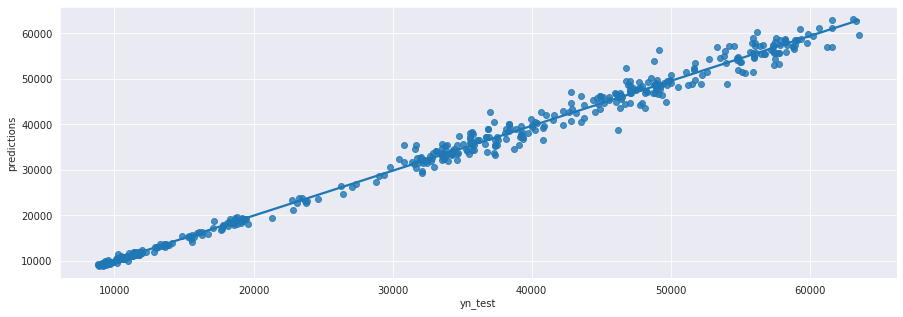

In [ ]:
sns.regplot(yn_test, y_pred, ci=None)
#plt.scatter(yn_test,y_pred)
plt.xlabel("yn_test")
plt.ylabel("predictions")
plt.show()

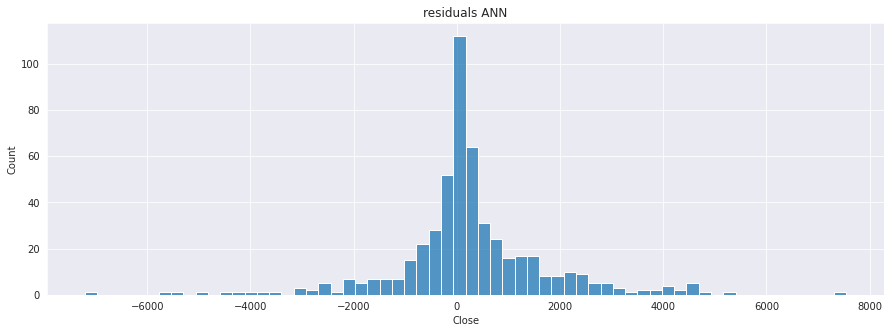

In [ ]:
residualsN = yn_test - y_pred
sns.histplot(residualsN)
plt.title("residuals ANN")
plt.show()

**Stacked LSTM (Long Short Term Memory)**

In [ ]:
LSTM = df['Close'].copy()
train_dates = pd.to_datetime(df['Date'])


In [ ]:
LSTM = LSTM.fillna(method='ffill')

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(LSTM).reshape(-1,1))

In [ ]:
print(df1)

[[0.00440947]
 [0.00389002]
 [0.0034219 ]
 ...
 [0.90237822]
 [0.96984608]
 [0.97039724]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(2069, 518)

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100 #uses previous 100 days to predict next day
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [ ]:
print(X_train.shape), print(y_train.shape)

(1968, 100)
(1968,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(417, 100)
(417,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
31/31 [==============================] - 12s 211ms/step - loss: 9.4062e-04 - val_loss: 0.0172
Epoch 2/100
31/31 [==============================] - 5s 175ms/step - loss: 1.9891e-04 - val_loss: 0.0100
Epoch 3/100
31/31 [==============================] - 5s 172ms/step - loss: 1.7233e-04 - val_loss: 0.0183
Epoch 4/100
31/31 [==============================] - 5s 174ms/step - loss: 1.4897e-04 - val_loss: 0.0289
Epoch 5/100
31/31 [==============================] - 5s 173ms/step - loss: 1.3833e-04 - val_loss: 0.0253
Epoch 6/100
31/31 [==============================] - 5s 172ms/step - loss: 1.2472e-04 - val_loss: 0.0171
Epoch 7/100
31/31 [==============================] - 5s 173ms/step - loss: 1.2765e-04 - val_loss: 0.0300
Epoch 8/100
31/31 [==============================] - 5s 170ms/step - loss: 1.1414e-04 - val_loss: 0.0346
Epoch 9/100
31/31 [==============================] - 5s 171ms/step - loss: 1.1491e-04 - val_loss: 0.0355
Epoch 10/100
31/31 [==============================] - 

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

5754.896064123879

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

35220.76530703928

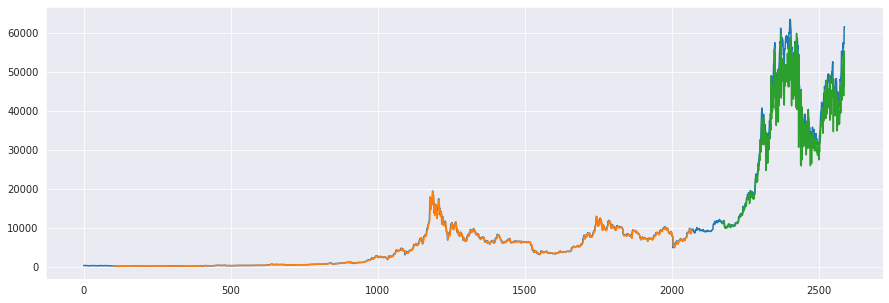

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Orange = training

---


Blue = original data set

---


Green = predicted

In [ ]:
%%shell
jupyter nbconvert --to html /content/DataScienceProject.ipynb

[NbConvertApp] Converting notebook /content/DataScienceProject.ipynb to html
[NbConvertApp] Writing 964409 bytes to /content/DataScienceProject.html
